In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
print(iris.data[0:5])
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
data=pd.DataFrame({'sepal length':iris.data[:,0],'sepal width':iris.data[:,1],'petal length':iris.data[:,2],'petal width':iris.data[:,3],'species':iris.target})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [6]:
clf.predict([[3, 5, 4, 2]])

array([1])

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.469010
petal width (cm)     0.412678
sepal length (cm)    0.087106
sepal width (cm)     0.031205
dtype: float64

No handles with labels found to put in legend.


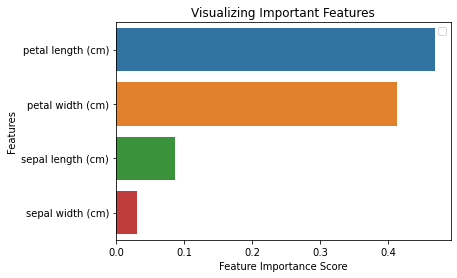

In [9]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X=data[['petal length', 'petal width','sepal length']]  
y=data['species']                                       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) 

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Species'] = data.target
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

In [13]:
x = df.drop(columns="Species")
y = df["Species"]
feature_names = x.columns
labels = y.unique()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

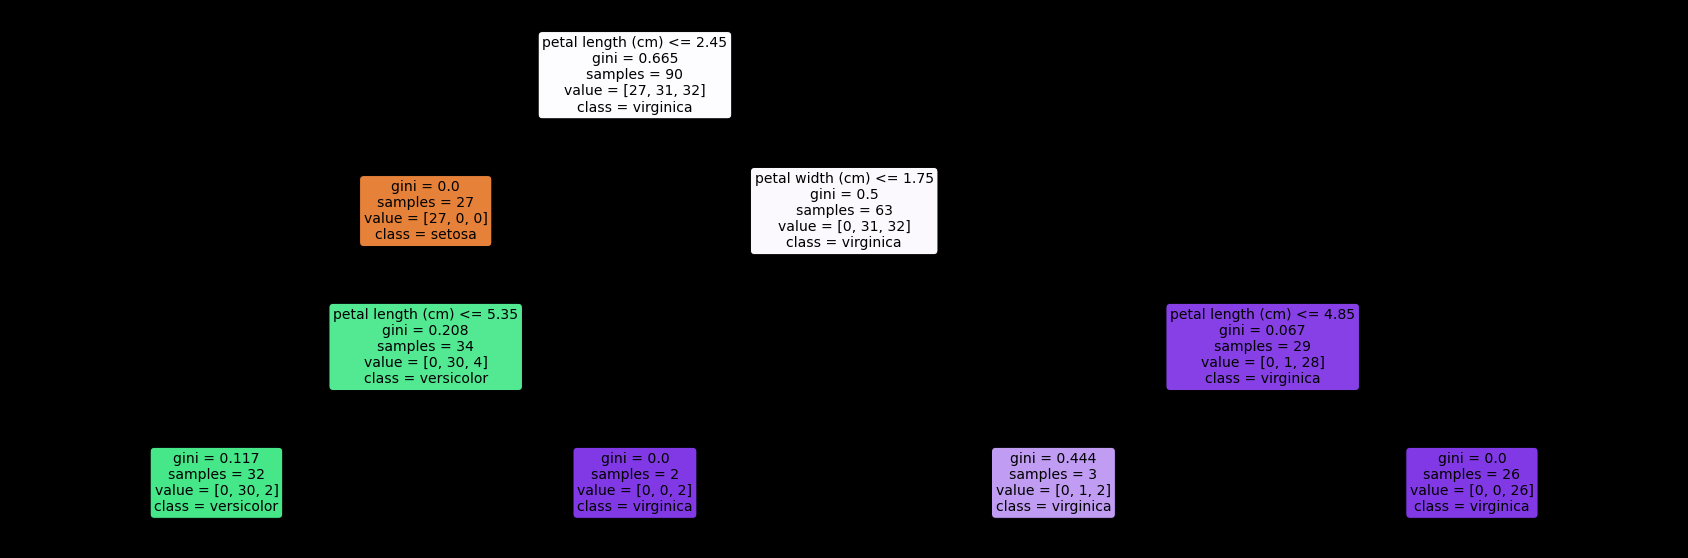

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10), facecolor ='k')
a = tree.plot_tree(clf,feature_names = feature_names,class_names = labels,rounded = True,filled = True,fontsize=14)
plt.show()

In [16]:
from sklearn import metrics
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333
